# Selectie en projectie

Als je het antwoord op een informatievraag zoekt in een database, dan moet je uit de gegevens in die database precies die elementen zien te vinden die antwoord geven op je vraag.
Dit doe je met behulp van een database *query* (zoekvraag).

Voor relationele databases gebruik je hiervoor de query-taal SQL (Structured Query Language).
Een relationele database bestaat uit een aantal tabellen die onderling naar elkaar kunnen verwijzen.
Een tabel bestaat uit rijen en kolommen.
De eerste stap bij het zoeken is de *selectie van de juiste rijen*; daarvan geef je alleen de kolommen weer die je nodig hebt voor het resultaat (*projectie*).

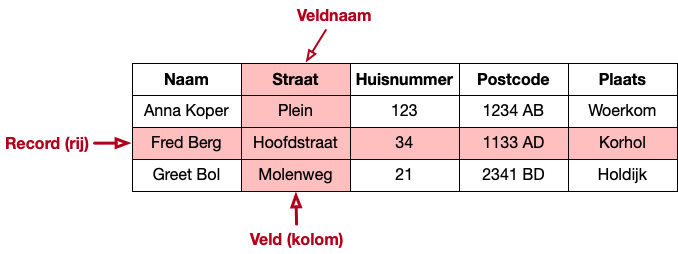

Als voorbeeld-tabel gebruiken we de Top2000 van de laatste jaren.
Deze database bestaat uit één tabel.

%LOAD data/example.db## Maak verbinding met de database

De eerste stap is om verbinding te maken met de database.

**Als je Basthon gebruikt.** Laad het notebook tegelijk met de database (door het gebruik van de juiste URL).
Je kunt de database ook later laden via het "File" menu. 
Zorg ervoor dat de database gekoppeld is vóór het uitvoeren van de SQL-opdrachten.

In [3]:
%LOAD data/top2000.db

## Verken de tabel

Met de volgende *query* verken je een klein stukje van de top2000-tabel.

Voor de cel hieronder uit door deze te selecteren (klik in de cel); geef vervolgens Shift-Enter in, of klik op het "run" driehoekje bovenin.

In [4]:
SELECT *
FROM top2000
LIMIT 10;

top,positie,titel,artiest,jaar
2015,1,Imagine,John Lennon,1971
2015,2,Bohemian Rhapsody,Queen,1975
2015,3,Hotel California,Eagles,1977
2015,4,Mag Ik Dan Bij Jou,Claudia De Breij,2011
2015,5,Stairway To Heaven,Led Zeppelin,1971
2015,6,Piano Man,Billy Joel,1974
2015,7,Avond,Boudewijn De Groot,1997
2015,8,Child In Time,Deep Purple,1972
2015,9,Wish You Were Here,Pink Floyd,1975
2015,10,Fix You,Coldplay,2005


De `SELECT` opdracht heeft de volgende basisstructuur:

```SQL
  SELECT <kolommen>
  FROM  <invoer-tabel(len)>
  WHERE <rij-voorwaarde>
  ORDER BY <kolommen> [ASC|DESC]
  LIMIT <aantal rijen>;
```

**Uitleg.** In het voorbeeld hierboven is het `WHERE`-deel weggelaten. Dat betekent dat de rij-voorwaarde `TRUE` is: *alle rijen* worden geselecteerd.
Op eenzelfde manier geeft de `*` achter `SELECT` aan dat het resultaat *alle kolommen* bevat.

De meeste onderdelen in de `SELECT` opdracht kun je weglaten, behalve `SELECT` en `FROM`.

Het `LIMIT`-deel beperkt het aantal rijen in het resultaat. Zowel de `*` als de `LIMIT` gebruik je vaak bij het verkennen van een database.

**Let op:** Een SQL-opdracht sluit je altijd af met een `;`

**Opdracht.** Pas het aantal in het `LIMIT` deel aan, en voer de query opnieuw uit.

Het `ORDER BY` deel kun je de volgorde van de rijen in het resultaat bepalen; zonder sortering krijg je de volgorde van de rijen in de oorspronkelijke tabel. De resultaat-volgorde kan opklimmend zijn (`ASC`) of dalend (`DESC`). Voorbeeld:

In [ ]:
SELECT *
FROM top2000
ORDER BY positie DESC
LIMIT 5;

**Opdracht.** Pas deze query aan zodat deze de laagste noteringen weergeeft, in plaats van de hoogste.

## Projectie van kolommen

Uit de bovenstaande opdracht heb je geleerd wat de *namen van de kolommen* zijn in de Top2000-tabel.
Dit kun je gebruiken om de kolommen in het resultaat te beperken tot die kolommen die je echt nodig hebt, zie het voorbeeld hieronder.

In de eerste regel, na `SELECT`, geef je aan welke kolommen in het resultaat voorkomen, en in welke volgorde. Dit noemen we ook wel **projectie**.

In [ ]:
SELECT top, positie, titel
FROM top2000
LIMIT 5;

**Opdracht** Pas de code hierboven aan: kies een andere combinatie van de kolommen voor het resultaat. Verander ook eens de volgorde van de kolommen; of geef de naam van een kolom tweemaal op.

**Vraag.** Heb je ook een idee van de *type*s van de kolommen? Welke kolommen bevatten getallen? Welke kolommen bevatten strings (tekenrijen)?

## Selectie van rijen

Je gebruik het `WHERE`-deel om op te geven welke *rijen* je in het resultaat wilt zien.
Alleen die rijen waarvoor de `WHERE`-voorwaarde `TRUE` is maken deel uit van het resultaat.

Voorbeeld:

In [ ]:
SELECT *
FROM top2000
WHERE artiest = 'Queen'
LIMIT 5;

**Uitleg.** Alleen die rijen waarvan de `artiest`-kolom de waarde `'Queen'` heeft maken deel uit van het resultaat. Merk op dat we een string-waarde in SQL tussen `'...'` weergeven.

**Opdracht.** Maak een selectie van de rijen van een andere artiest.

**Andere operatoren.** De selectie-voorwaarde kan ook andere vergelijkingsoperatoren bevatten, zoals `<` of `<=` of `>` of `>=` of `!=` (ongelijk). Voorbeeld:

In [ ]:
SELECT *
FROM top2000
WHERE jaar < 1970
LIMIT 5;

**LIKE met Jokers (wildcards)**. Soms weet je niet hoe een naam (string) precies gespeld is.
In dat geval kun je de `LIKE` operator gebruiken.
In `LIKE '_an%Berg'` staat de `_` voor een willekeurig teken en `%` voor een willekeurige rij tekens (0 of meer).
Dit past bijvoorbeeld op `'Van den Berg'`, `van de Berg`, of `van Berg`.

> Deze tekens komt overeen met de "wildcard" tekens `?` en `*` in bijvoorbeeld de Unix/Linux shell.

In [ ]:
SELECT *
FROM top2000
WHERE jaar = 1970 and artiest LIKE '%Beatles';

Je ziet aan dit resultaat dat de namen van de artiesten niet altijd op dezelfde manier geschreven zijn. Datzelfde geldt overigens ook voor de titels van de nummers. Dat maakt het lastig om met de data te werken! Later zullen we proberen om deze data meer uniform te maken.

**Samengestelde voorwaarde.** Een selectie-voorwaarde (`WHERE`-voorwaarde) kan ook samengesteld zijn, met behulp van logische `AND` en `OF` operatoren.
Voorbeeld:

In [ ]:
SELECT *
FROM top2000
WHERE positie < 30 AND jaar < 1970;

### DISTINCT: unieke rijen

Bekijk het resultaat van de volgende opdracht:

In [ ]:
SELECT titel, jaar
FROM top2000
WHERE positie < 30 and jaar <1970;

Dit resultaat bevat eigenlijk 2 rijen, die beide meerdere keren voorkomen.
Met behulp van `SELECT DISTINCT` vermijd je die dubbele voorkomens van eenzelfde rij:

In [ ]:
SELECT DISTINCT titel, jaar
FROM top2000
WHERE positie < 30 AND jaar < 1970;

**Vraag.** In de oorspronkelijke tabel komen geen dubbele rijen voor. Waardoor krijg je die dubbele voorkomens in het vorige resultaat?

**Tip.** `SELECT DISTINCT` is bijvoorbeeld handig als je wilt weten welke waarden in een tabel voorkomen. Bijvoorbeeld:

In [ ]:
SELECT DISTINCT top
FROM top2000;

## Opmerkingen

**Kolomnamen.** We gebruiken hierboven een `SELECT`-opdracht met een enkele tabel.
De kolomnamen die gebruikt worden in de selectie-voorwaarde en in de projectie moeten dan van die tabel afkomstig zijn.
Als je meer tabellen hebt in het `FROM`-deel, bijvoorbeeld `nummers` en `artiesten`, dan gebruik je `nummers.titel` en `artiesten.naam` om precies aan te geven welke kolom je bedoelt. 

## Enkele voorbeelden

Wat zijn de Top2000-nummers (alleen titel met artiest en jaartal) die gemaakt zijn voor 1957, gesorteerd op jaartal?

In [ ]:
SELECT titel, artiest, jaar
FROM top2000
WHERE jaar < 1957
ORDER BY jaar, titel;

Zoals je ziet komen sommige nummers vaker voor. Je kunt dan tellen hoe vaak een bepaald nummer in de top2000 voorkomt; of bepalen welk nummer van voor 1960 het meest populair is.

Als je wilt dat elk nummer maar één keer in het resultaat voorkomt, gebruik je `DISTINCT`:

In [ ]:
SELECT DISTINCT titel, artiest, jaar
FROM top2000
WHERE jaar < 1957
ORDER BY jaar;